In [1]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

In [2]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [3]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

In [4]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [5]:
metrics.rand_score(labels_pred, labels_true)

0.6666666666666666

In [6]:
labels_pred = labels_true[:]
metrics.rand_score(labels_true, labels_pred)

1.0

In [7]:
metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

In [8]:
labels_true = [0, 0, 0, 0, 0, 0, 1, 1]
labels_pred = [0, 1, 2, 3, 4, 5, 5, 6]
metrics.rand_score(labels_true, labels_pred)

0.39285714285714285

In [9]:
metrics.adjusted_rand_score(labels_true, labels_pred)

-0.07207207207207207

Mutual Information based scores

In [11]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

In [12]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.2987924581708901

In [13]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.2987924581708901

In [10]:
metrics.adjusted_mutual_info_score(labels_pred, labels_true)

-0.1327047275933195

In [14]:
labels_pred = labels_true[:]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

1.0

In [17]:
metrics.normalized_mutual_info_score(labels_true, labels_pred)

0.49999999999999983

In [16]:
metrics.mutual_info_score(labels_true, labels_pred)

0.693147180559945

In [15]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

-0.16666666666666655

Spectral clustering for image segmentation

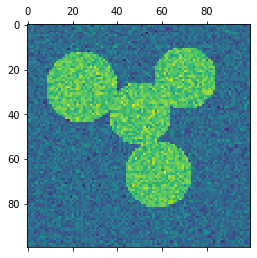

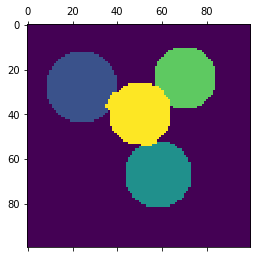

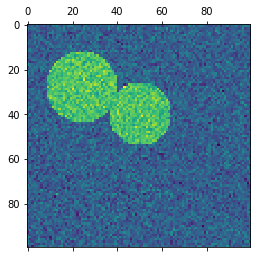

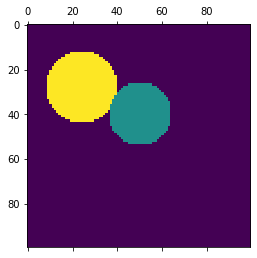

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()